<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        1. Import libraries, classes, custom functions, and data load</h1>

In [2]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [4]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()

utils.YelpDatasets_Revies(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


#### Approach 1

In [42]:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(reviews['text'])

# Combine text features with binary features
X = tfidf_features
X = np.hstack((X.toarray(), reviews[['useful', 'funny', 'cool']].values))

# Encode the target variable (e.g., stars)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reviews['stars'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classification model (e.g., Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
"""

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import accuracy_score, classification_report\nimport numpy as np\n\n# Preprocessing and feature extraction\ntfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed\ntfidf_features = tfidf_vectorizer.fit_transform(reviews[\'text\'])\n\n# Combine text features with binary features\nX = tfidf_features\nX = np.hstack((X.toarray(), reviews[[\'useful\', \'funny\', \'cool\']].values))\n\n# Encode the target variable (e.g., stars)\nlabel_encoder = LabelEncoder()\ny = label_encoder.fit_transform(reviews[\'stars\'])\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Choose and train a classification model (e.g., Multinomial Naive Bayes)\nclas

#### Approach 2 Miguel example

In [43]:
#pip install tensorflow

In [44]:
import pandas as pd,numpy as np,seaborn as sns
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import spacy

In [45]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [46]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [47]:
yelp_reviews=reviews.drop(['review_id','user_id','business_id','date','useful','funny','cool'],axis=1)
yelp_reviews.head()

,stars,text
0,3,"If you decide to eat here, just be aware it is..."
1,5,I've taken a lot of spin classes over the year...
2,3,Family diner. Had the buffet. Eclectic assortm...
3,5,"Wow! Yummy, different, delicious. Our favo..."
4,4,Cute interior and owner (?) gave us tour of up...


In [48]:
yelp_reviews.isnull().any()

stars    False
text     False
dtype: bool

In [49]:
yelp_reviews.stars.unique()

array([3, 5, 4, 1, 2], dtype=int64)

c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

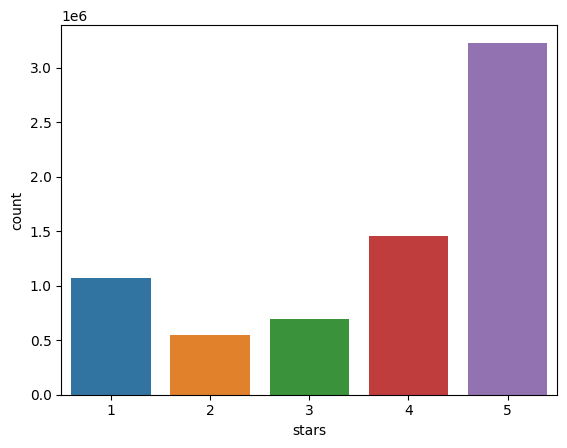

In [50]:
sns.countplot(yelp_reviews.stars)

In [51]:
yelp_reviews.stars.mode() # The data that is most to be sampled

0    5
dtype: int64

In [52]:
reviews_not_three = yelp_reviews[yelp_reviews.stars!=3]

In [53]:
reviews_not_three['label'] = reviews_not_three['stars'].apply(lambda x: 1 if x>3 else 0)
reviews_not_three = reviews_not_three.drop('stars',axis=1)
reviews_not_three.head()

C:\Users\Karim\AppData\Local\Temp\ipykernel_5388\94272368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_not_three['label'] = reviews_not_three['stars'].apply(lambda x: 1 if x>3 else 0)


,text,label
1,I've taken a lot of spin classes over the year...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
5,I am a long term frequent customer of this est...,0
6,Loved this tour! I grabbed a groupon and the p...,1


In [54]:
reviews_not_three.shape

(6298346, 2)

In [55]:
text = reviews_not_three.text.values
label = reviews_not_three.label.values

In [56]:
#python -m spacy download en_core_web_sm

In [57]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0.tar.gz

In [58]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [59]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [60]:
import spacy
print(spacy.__version__)

3.6.1


In [61]:
text[0]

"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!"

In [62]:
parsed_text = nlp(text[0])
parsed_text

I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

In [63]:
for i,sentance in enumerate(parsed_text.sents):
    print(i,':',sentance)

0 : I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle.
1 : From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.


2 : For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).


3 : There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out.
4 : Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed.
5 : He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone.
6 : Russell always wears a smile on his face, even when he's kicking your butt in class!


In [64]:
for num, entity in enumerate(nlp(text[10]).ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)

Entity 1: first - ORDINAL
Entity 2: Sonoran Dogs - PERSON


In [65]:
token_pos = [token.pos_ for token in nlp(text[10])]
tokens = [token for token in nlp(text[10])]
sd = list(zip(tokens,token_pos))
sd = pd.DataFrame(sd,columns=['token','pos'])
sd.head()

,token,pos
0,The,DET
1,bun,NOUN
2,makes,VERB
3,the,DET
4,Sonoran,PROPN


In [66]:
max_num_words = 1000
max_seq_length = 100
tokenizer = Tokenizer(num_words=max_num_words)

In [67]:
len(reviews)

6990280

In [68]:
reviews=reviews[:100000]
reviews=reviews[reviews.stars!=3]

reviews["labels"]= reviews["stars"].apply(lambda x: 1 if x > 3  else 0)
reviews=reviews.drop("stars",axis=1)

reviews.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,labels
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,0
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1


In [69]:
texts = reviews["text"].values
labels = reviews["labels"].values

In [70]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [71]:
len(word_index)

69661

In [72]:
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[  2, 282,   5, ...,  70,  11, 909],
       [  0,   0,   0, ..., 566,  20, 109],
       [  0,   0,   0, ...,  46,   7,   1],
       ...,
       [  0,   0,   0, ..., 227,   8,   3],
       [  0,   0,   0, ..., 239,   9,  39],
       [  0,   0,   0, ..., 502,   4,  77]])

In [73]:
data.shape

(88638, 100)

In [74]:
labels = to_categorical(np.asarray(labels))

In [75]:
labels.shape

(88638, 2)

In [76]:
validation_spilit = 0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [77]:
data = data[indices]
data

array([[  0,   0,   0, ..., 153, 153, 586],
       [  0,   0,   0, ..., 151, 143, 742],
       [  0,   0,   0, ...,   3, 284,  44],
       ...,
       [ 37, 166,   2, ..., 244, 404,  96],
       [  0,   0,   0, ...,  39,  38,  11],
       [  0,   0,   0, ...,  35, 148,  74]])

In [78]:
labels = labels[indices]
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [79]:
nb_validation_samples = int(validation_spilit*data.shape[0])
nb_validation_samples

17727

In [80]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [83]:
glove_dir = 'D:/College/20231(M)/ADC'

In [84]:
embedding_index = {}

f = open(os.path.join(glove_dir,'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

print('found word vecs: ',len(embedding_index))

found word vecs:  0


In [85]:
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
embedding_matrix.shape

(69662, 50)

In [86]:
for word,i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index)+1,embedding_dim,weights=[embedding_matrix],input_length=max_seq_length,trainable=False)

In [88]:
from keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D
from keras.layers import LSTM,Input,Dense,Dropout,Activation
from keras.models import Model

In [89]:
inp = Input(shape=(max_seq_length,))
x = embedding_layer(inp)
x = Bidirectional(LSTM(50,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(2,activation='sigmoid')(x)
model = Model(inputs=inp,outputs=x)

In [90]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(70911, 100)
(70911, 2)
(17727, 100)
(17727, 2)


In [92]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=128);

Epoch 1/20
554/554 [==============================] - 2742s 5s/step - loss: 0.6311 - accuracy: 0.7875 - val_loss: 0.5870 - val_accuracy: 0.7798
Epoch 2/20
554/554 [==============================] - 2680s 5s/step - loss: 0.5561 - accuracy: 0.7884 - val_loss: 0.5440 - val_accuracy: 0.7798
Epoch 3/20
554/554 [==============================] - 2678s 5s/step - loss: 0.5273 - accuracy: 0.7884 - val_loss: 0.5303 - val_accuracy: 0.7798
Epoch 4/20
554/554 [==============================] - 23081s 42s/step - loss: 0.5185 - accuracy: 0.7884 - val_loss: 0.5274 - val_accuracy: 0.7798
Epoch 5/20
554/554 [==============================] - 2715s 5s/step - loss: 0.5164 - accuracy: 0.7884 - val_loss: 0.5272 - val_accuracy: 0.7798
Epoch 6/20
554/554 [==============================] - 2651s 5s/step - loss: 0.5161 - accuracy: 0.7884 - val_loss: 0.5273 - val_accuracy: 0.7798
Epoch 7/20
554/554 [==============================] - 26171s 47s/step - loss: 0.5161 - accuracy: 0.7884 - val_loss: 0.5274 - val_accur

In [93]:
score = model.evaluate(x_val,y_val)
score

554/554 [==============================] - 160s 285ms/step - loss: 0.5274 - accuracy: 0.7798


[0.5273854732513428, 0.7797709703445435]

In [94]:
score[1]*100

77.97709703445435

#### Approach 3

In [5]:
reviews = reviews.sample(n=5000, random_state=42)

In [6]:
# Load the spaCy template into English
nlp = spacy.load("en_core_web_sm")

# Function to perform preprocessing
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply the preprocessing function to the texts of the reviews
reviews['processed_text'] = reviews['text'].apply(preprocess_text)


In [7]:
X = reviews['processed_text']
y = reviews['stars']  # Supondo que 'stars' seja a coluna que contém a classificação das avaliações

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Adjust the maximum number of features as needed

# Transform training and test data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

Accuracy: 0.54
              precision    recall  f1-score   support

           1       0.75      0.40      0.52       146
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00       109
           4       0.00      0.00      0.00       186
           5       0.53      0.99      0.69       488

    accuracy                           0.54      1000
   macro avg       0.25      0.28      0.24      1000
weighted avg       0.37      0.54      0.41      1000



c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


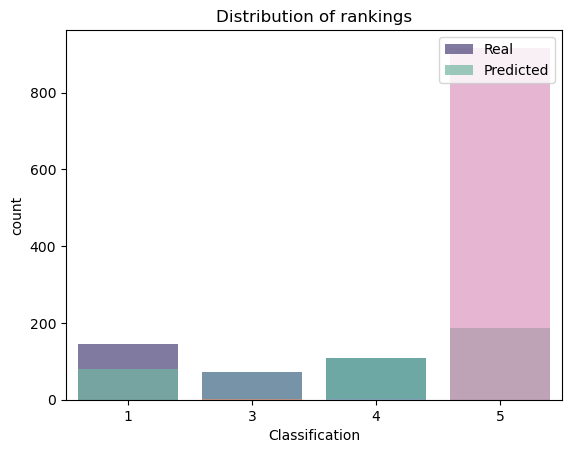

In [11]:
# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Plot the distribution of actual vs. predicted classifications
sns.countplot(x=y_test, palette='viridis', label='Real', alpha=0.7)
sns.countplot(x=y_pred, palette='Set2', label='Predicted', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('Classification')
plt.title('Distribution of rankings')
plt.show()